# Project - Probability of default for credit card


Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load data

In [ ]:
df = pd.read_excel("default_of_credit_card_clients.xls", header = 1)

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


First we have to understand features in this dataset

In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

ID - ID  
LIMIT_BAL -   
SEX -  
EDUCATION -  
MARRIAGE -  
AGE-  


In [ ]:
df.iloc[:,:6].head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE
0,1,20000,2,2,1,24
1,2,120000,2,2,2,26
2,3,90000,2,2,2,34
3,4,50000,2,2,1,37
4,5,50000,1,2,1,57


In [ ]:
df.iloc[:,6:12].head()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,2,2,-1,-1,-2,-2
1,-1,2,0,0,0,2
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,-1,0,-1,0,0,0


In [ ]:
df.iloc[:,12:18].head()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0,3913,3102,689,0,0,0
1,2682,1725,2682,3272,3455,3261
2,29239,14027,13559,14331,14948,15549
3,46990,48233,49291,28314,28959,29547
4,8617,5670,35835,20940,19146,19131


In [ ]:
df.iloc[:,18:24].head()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0,689,0,0,0,0
1,0,1000,1000,1000,0,2000
2,1518,1500,1000,1000,1000,5000
3,2000,2019,1200,1100,1069,1000
4,2000,36681,10000,9000,689,679


In [ ]:
df.iloc[:,24:].head()

,default payment next month
0,1
1,1
2,0
3,0
4,0


## Let's check quality of this dataset

In [ ]:
print("Number of row with empty values")
df.isnull().sum().sum()

Number of row with empty values


0

In [ ]:
print("Number of duplicated rows")
df.duplicated().any()

Number of duplicated rows


False

In [ ]:
print("Let's look at basic statistic for each column. Looking for some incoreect value - for example age = -2")
df.iloc[:,:12].describe()

Let's look at basic statistic for each column. Looking for some incoreect value - for example age = -2


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [ ]:
df.iloc[:,12:].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Look at types of each variable.

In [ ]:
df.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [ ]:
#Here can be a problem, because sometimes we can get incorrect value for dividing ints.
a = 2.0
b = 3
print(f"Type for a={type(a)}. Type for b={type(b)}")

Type for a=<class 'float'>. Type for b=<class 'int'>


Now we can look for example how many credit card men and women have on every level of education

In [ ]:
pd.crosstab(index = df.SEX, columns = df.EDUCATION, values = df.iloc[:,-1], aggfunc = "count")

EDUCATION,0,1,2,3,4,5,6
SEX,,,,,,,
1,8,4354,5374,1990,42,95,25
2,6,6231,8656,2927,81,185,26


Here we know how many defaults was there

In [ ]:
pd.crosstab(index = df.SEX, columns = df.EDUCATION, values = df.iloc[:,-1], aggfunc = "sum")

EDUCATION,0,1,2,3,4,5,6
SEX,,,,,,,
1,0,906,1408,545,4,6,4
2,0,1130,1922,692,3,12,4


Now create some graphs for some features - we should do it for each feature and think about it.

In [ ]:
df["default payment next month"].value_counts(normalize = True)

0    0.7788
1    0.2212
Name: default payment next month, dtype: float64

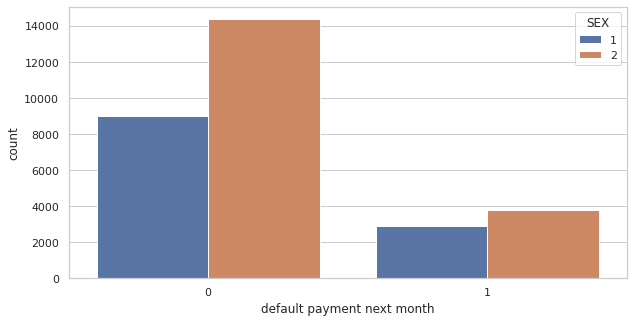

In [ ]:
plt.figure(figsize=(10,5))
sns.set(font_scale=1, style="whitegrid")
sns.countplot(data=df, x = "default payment next month", hue="SEX")